In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load (utf-8 인코딩)
path = "./reallastdata.csv"
df = pd.read_csv(path, encoding="utf-8")
df.columns = df.columns.str.strip().str.replace('"','', regex=False).str.replace("﻿","", regex=False)

# 숫자형 변환
df["author_playtime_forever"] = pd.to_numeric(df["author_playtime_forever"], errors="coerce")

# Pareto 기준 (상위 ~8%가 전체 플레이타임 80% 소비)
dd = df.sort_values("author_playtime_forever", ascending=False).reset_index(drop=True)
cum = dd["author_playtime_forever"].cumsum()
thr = dd.loc[(cum >= 0.80 * dd["author_playtime_forever"].sum()).idxmax(), "author_playtime_forever"]

# 헤비 리뷰어 여부
df["is_heavy"] = (df["author_playtime_forever"] >= thr).astype(int)

# 게임 단위 집계
g = df.groupby("appid").agg(
    total_reviews=("voted_up","count"),
    pos_reviews=("voted_up","sum"),
    heavy_reviews=("is_heavy","sum")
).reset_index()

g["rec_rate"] = g["pos_reviews"] / g["total_reviews"]
g["heavy_ratio"] = g["heavy_reviews"] / g["total_reviews"]
g["log_total_reviews"] = np.log1p(g["total_reviews"])
g = g[g["total_reviews"] >= 30].copy()

c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


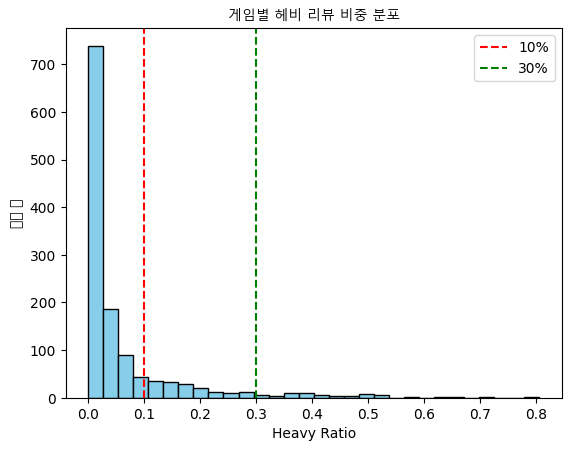

c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


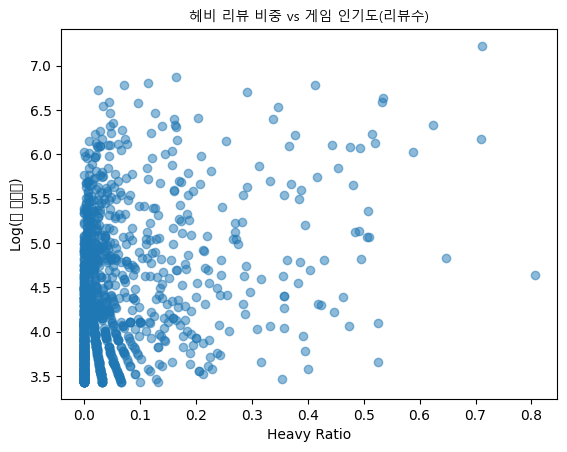

In [5]:
plt.hist(g["heavy_ratio"], bins=30, color="skyblue", edgecolor="black")
plt.axvline(0.1, color="red", linestyle="--", label="10%")
plt.axvline(0.3, color="green", linestyle="--", label="30%")
plt.title("게임별 헤비 리뷰 비중 분포", fontproperties="Malgun Gothic")  # 윈도우
# plt.title("게임별 헤비 리뷰 비중 분포", fontproperties="AppleGothic")  # 맥
plt.xlabel("Heavy Ratio")
plt.ylabel("게임 수")
plt.legend()
plt.show()

# 2. 헤비 리뷰 비중 vs 인기도(리뷰수)
plt.scatter(g["heavy_ratio"], g["log_total_reviews"], alpha=0.5)
plt.title("헤비 리뷰 비중 vs 게임 인기도(리뷰수)", fontproperties="Malgun Gothic")
plt.xlabel("Heavy Ratio")
plt.ylabel("Log(총 리뷰수)")
plt.show()

c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Downloads\mscd\archive\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


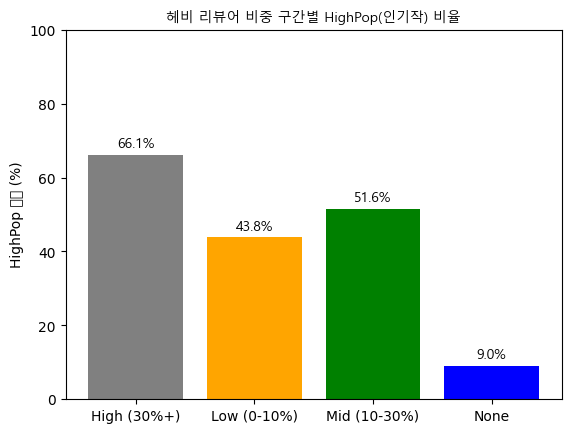

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 데이터 로드 ---
path = "./reallastdata.csv"
df = pd.read_csv(path, encoding="utf-8")
df.columns = df.columns.str.strip().str.replace('"','', regex=False).str.replace("﻿","", regex=False)

df["author_playtime_forever"] = pd.to_numeric(df["author_playtime_forever"], errors="coerce")

# Pareto 기준 헤비 리뷰어 정의
dd = df.sort_values("author_playtime_forever", ascending=False).reset_index(drop=True)
cum = dd["author_playtime_forever"].cumsum()
thr = dd.loc[(cum >= 0.80 * dd["author_playtime_forever"].sum()).idxmax(), "author_playtime_forever"]

df["is_heavy"] = (df["author_playtime_forever"] >= thr).astype(int)

# 게임 단위 집계
g = df.groupby("appid").agg(
    total_reviews=("voted_up","count"),
    pos_reviews=("voted_up","sum"),
    heavy_reviews=("is_heavy","sum")
).reset_index()

g["rec_rate"] = g["pos_reviews"]/g["total_reviews"]
g["heavy_ratio"] = g["heavy_reviews"]/g["total_reviews"]
g["log_total_reviews"] = np.log1p(g["total_reviews"])
g = g[g["total_reviews"] >= 30].copy()

# --- 구간 나누기 ---
def bin_func(x):
    if x <= 0: return "None"
    elif x < 0.10: return "Low (0-10%)"
    elif x < 0.30: return "Mid (10-30%)"
    else: return "High (30%+)"
g["heavy_bin"] = g["heavy_ratio"].apply(bin_func)

# HighPop 정의 (상위 1/3 리뷰수)
g["pop_bin"] = pd.qcut(g["log_total_reviews"], q=3, labels=["Low","Mid","High"], duplicates="drop")
g["HighPop"] = (g["pop_bin"]=="High").astype(int)

# --- 구간별 HighPop 비율 ---
pop_rate = g.groupby("heavy_bin")["HighPop"].mean().reset_index()

# --- 시각화 ---
plt.bar(pop_rate["heavy_bin"], pop_rate["HighPop"]*100, color=["gray","orange","green","blue"])
for i, v in enumerate(pop_rate["HighPop"]*100):
    plt.text(i, v+2, f"{v:.1f}%", ha="center", fontproperties="Malgun Gothic")

plt.title("헤비 리뷰어 비중 구간별 HighPop(인기작) 비율", fontproperties="Malgun Gothic")
plt.ylabel("HighPop 비율 (%)")
plt.ylim(0,100)
plt.show()
